#Imports

In [2]:
import pandas as pd
import numpy as np
import os
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


In [1]:
!pip install inflection


#Loading Data

In [1]:
train = pd.read_csv('C:\Users\PâmelaBotelhoMagalhã\OneDrive - Dataside\Documentos\Estudos\house_prices\house-prices-advanced-regression-techniques\train.csv')
test = pd.read_csv('C:\Users\PâmelaBotelhoMagalhã\OneDrive - Dataside\Documentos\Estudos\house_prices\house-prices-advanced-regression-techniques\test.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4217273577.py, line 1)

#1.0 Data Description

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

1.1 Rename Columns

In [12]:
df1 = train.copy()

In [13]:
cols_old = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [14]:
snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new

In [ ]:
# Verificando Rename método snakecase
df1.columns

Index(['id', 'ms_sub_class', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition1', 'condition2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'exterior1st',
       'exterior2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmt_fin_type1', 'bsmt_fin_sf1', 'bsmt_fin_type2', 'bsmt_fin_sf2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual',
       'tot_rms_abv_grd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

1.2. Data Dimensions

In [ ]:
df1.shape

(1460, 81)

1.3. Data types

In [ ]:
df1.dtypes

id                  int64
ms_sub_class        int64
ms_zoning          object
lot_frontage      float64
lot_area            int64
                   ...   
mo_sold             int64
yr_sold             int64
sale_type          object
sale_condition     object
sale_price          int64
Length: 81, dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1460 non-null   int64  
 1   ms_sub_class     1460 non-null   int64  
 2   ms_zoning        1460 non-null   object 
 3   lot_frontage     1201 non-null   float64
 4   lot_area         1460 non-null   int64  
 5   street           1460 non-null   object 
 6   alley            91 non-null     object 
 7   lot_shape        1460 non-null   object 
 8   land_contour     1460 non-null   object 
 9   utilities        1460 non-null   object 
 10  lot_config       1460 non-null   object 
 11  land_slope       1460 non-null   object 
 12  neighborhood     1460 non-null   object 
 13  condition1       1460 non-null   object 
 14  condition2       1460 non-null   object 
 15  bldg_type        1460 non-null   object 
 16  house_style      1460 non-null   object 
 17  overall_qual  

1.4 Check N/A's

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head(25)

pool_qc           1453
misc_feature      1406
alley             1369
fence             1179
fireplace_qu       690
lot_frontage       259
garage_yr_blt       81
garage_cond         81
garage_type         81
garage_finish       81
garage_qual         81
bsmt_fin_type2      38
bsmt_exposure       38
bsmt_qual           37
bsmt_cond           37
bsmt_fin_type1      37
mas_vnr_area         8
mas_vnr_type         8
electrical           1
id                   0
functional           0
fireplaces           0
kitchen_qual         0
kitchen_abv_gr       0
bedroom_abv_gr       0
dtype: int64

1.5. Fillout NA's

In [15]:
#Excluindo colunas
df1 = df1.drop(['pool_qc', 'misc_feature', 'alley', 'fence',], axis=1)

In [16]:
 #Verificando qtd valores
 df1['fireplace_qu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: fireplace_qu, dtype: int64

In [17]:
#Substituindo valores faltantes por um valor mais frequente
df1['fireplace_qu'].fillna('TA', inplace=True)

In [18]:
 #Verificando qtd valores
 df1['lot_frontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: lot_frontage, Length: 110, dtype: int64

In [ ]:
print(df1['lot_frontage'].mean())

70.04995836802665


In [19]:
#Substituindo valores faltantes pela média
df1['lot_frontage'].fillna(df1['lot_frontage'].mean(), inplace=True)


In [ ]:
 #Verificando valores
df1['garage_yr_blt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [20]:
 #Substituindo valores faltantes pela média
 df1['garage_yr_blt'].fillna(df1['garage_yr_blt'].mean(), inplace= True)

In [21]:
 #Verificando qtd valores
 df1['garage_cond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: garage_cond, dtype: int64

In [26]:
#Substituindo valores faltantes por um valor mais frequente
df1['garage_cond'].fillna('TA', inplace=True)

In [28]:
  #Verificando qtd valores
df1['garage_type'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: garage_type, dtype: int64

In [29]:
#Substituindo valores faltantes por um valor mais frequente
df1['garage_type'].fillna('Attchd', inplace=True)

In [31]:
  #Verificando qtd valores
df1['garage_finish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: garage_finish, dtype: int64

In [32]:
#Substituindo valores faltantes por um valor mais frequente
df1['garage_finish'].fillna('Unf', inplace=True)

In [34]:
#Verificando qtd valores
df1['garage_qual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: garage_qual, dtype: int64

In [35]:
#Substituindo valores faltantes por um valor mais frequente
df1['garage_qual'].fillna('TA', inplace=True)

In [36]:
#Verificando qtd valores
df1['bsmt_fin_type2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: bsmt_fin_type2, dtype: int64

In [37]:
#Substituindo valores faltantes por um valor mais frequente
df1['bsmt_fin_type2'].fillna('Unf', inplace=True)

In [38]:
#Verificando qtd valores
df1['bsmt_exposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: bsmt_exposure, dtype: int64

In [39]:
#Substituindo valores faltantes por um valor mais frequente
df1['bsmt_exposure'].fillna('No', inplace=True)

In [40]:
#Verificando qtd valores
df1['bsmt_qual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: bsmt_qual, dtype: int64

In [41]:
#Substituindo valores faltantes por um valor mais frequente
df1['bsmt_qual'].fillna('TA', inplace=True)

In [42]:
#Verificando qtd valores
df1['bsmt_cond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: bsmt_cond, dtype: int64

In [43]:
#Substituindo valores faltantes por um valor mais frequente
df1['bsmt_cond'].fillna('TA', inplace=True)

In [44]:
#Verificando qtd valores
df1['bsmt_fin_type1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: bsmt_fin_type1, dtype: int64

In [45]:
#Substituindo valores faltantes por um valor mais frequente
df1['bsmt_fin_type1'].fillna('Unf', inplace=True)

In [46]:
#Substituindo valores faltantes pela média
df1['mas_vnr_area'].fillna(df1['mas_vnr_area'].mean(), inplace= True)

In [47]:
#Verificando qtd valores
df1['mas_vnr_type'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: mas_vnr_type, dtype: int64

In [48]:
#Substituindo valores faltantes por um valor mais frequente
df1['mas_vnr_type'].fillna('None', inplace=True)

In [49]:
#Verificando qtd valores
df1['electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64

In [50]:
#Substituindo valores faltantes por um valor mais frequente
df1['electrical'].fillna('SBrkr', inplace=True)

In [51]:
#Verificando se ainda há N/As
df1.isnull().sum().sort_values(ascending=False).head(25)

id                 0
half_bath          0
fireplace_qu       0
fireplaces         0
functional         0
tot_rms_abv_grd    0
kitchen_qual       0
kitchen_abv_gr     0
bedroom_abv_gr     0
full_bath          0
heating_qc         0
bsmt_half_bath     0
bsmt_full_bath     0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
electrical         0
garage_type        0
garage_yr_blt      0
garage_finish      0
garage_cars        0
sale_condition     0
sale_type          0
yr_sold            0
dtype: int64

1.6. Change Types

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1460 non-null   int64  
 1   ms_sub_class     1460 non-null   int64  
 2   ms_zoning        1460 non-null   object 
 3   lot_frontage     1460 non-null   float64
 4   lot_area         1460 non-null   int64  
 5   street           1460 non-null   object 
 6   lot_shape        1460 non-null   object 
 7   land_contour     1460 non-null   object 
 8   utilities        1460 non-null   object 
 9   lot_config       1460 non-null   object 
 10  land_slope       1460 non-null   object 
 11  neighborhood     1460 non-null   object 
 12  condition1       1460 non-null   object 
 13  condition2       1460 non-null   object 
 14  bldg_type        1460 non-null   object 
 15  house_style      1460 non-null   object 
 16  overall_qual     1460 non-null   int64  
 17  overall_cond  

In [52]:
# Convertendo de float para int
df1['garage_yr_blt'] = df1['garage_yr_blt'].astype(int)


1.7. Descriptive Statistical

In [53]:
num_attributes = df1.select_dtypes (include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes (exclude = ['int64', 'float64','int32'])

In [ ]:
#Verificando
num_attributes.sample(2)

,id,ms_sub_class,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmt_fin_sf1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_price
195,196,160,24.0,2280,6,6,1976,1976,0.0,566,...,87,0,0,0,0,0,0,7,2009,148500
1299,1300,20,75.0,7500,5,7,1959,1994,0.0,340,...,218,0,0,0,0,0,0,5,2010,154000


In [ ]:
#Verificando
cat_attributes.sample(2)

,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,...,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type,sale_condition
106,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,Fa,Fa,N,WD,Normal
587,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Normal


1.7.1 Numerical Attributes

In [54]:
#Central Tendency - Mean and Median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew and kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () )).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis () )).T

#Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,1460.0,1459.0,730.500000,730.500000,421.465598,0.000000,-1.200000
1,ms_sub_class,20.0,190.0,170.0,56.897260,50.000000,42.286082,1.407657,1.580188
2,lot_frontage,21.0,313.0,292.0,70.049958,70.049958,22.016479,2.384950,21.848165
3,lot_area,1300.0,215245.0,213945.0,10516.828082,9478.500000,9977.846105,12.207688,203.243271
4,overall_qual,1.0,10.0,9.0,6.099315,6.000000,1.382523,0.216944,0.096293
5,overall_cond,1.0,9.0,8.0,5.575342,5.000000,1.112418,0.693067,1.106413
6,year_built,1872.0,2010.0,138.0,1971.267808,1973.000000,30.192559,-0.613461,-0.439552
7,year_remod_add,1950.0,2010.0,60.0,1984.865753,1994.000000,20.638335,-0.503562,-1.272245
8,mas_vnr_area,0.0,1600.0,1600.0,103.685262,0.000000,180.507263,2.676412,10.154316
9,bsmt_fin_sf1,0.0,5644.0,5644.0,443.639726,383.500000,455.941866,1.685503,11.118236


<ipython-input-32-ae6375a4cace>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df1['sale_price'])


<Axes: xlabel='sale_price', ylabel='Density'>

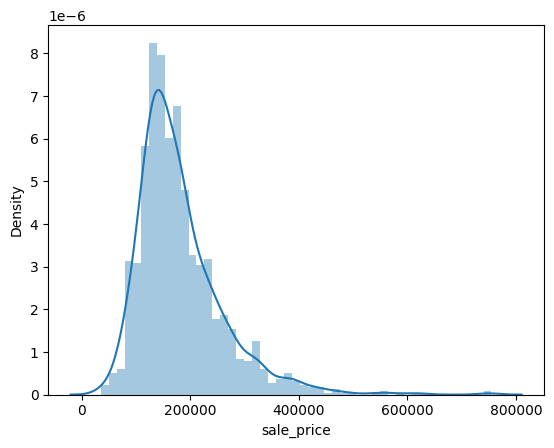

In [ ]:
sns.distplot (df1['sale_price'])

<ipython-input-46-c9e91e3e6356>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df1['lot_area'])


<Axes: xlabel='lot_area', ylabel='Density'>

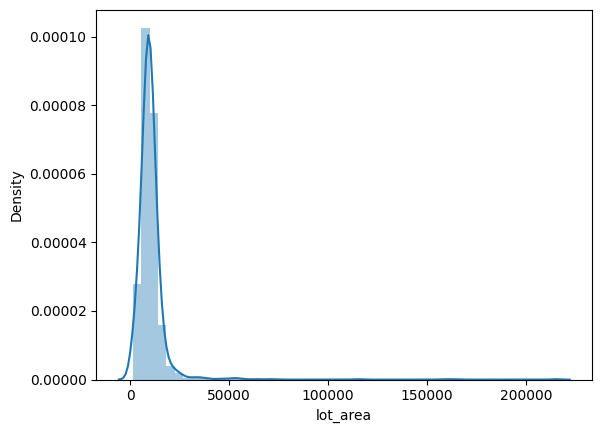

In [ ]:
sns.distplot (df1['lot_area'])

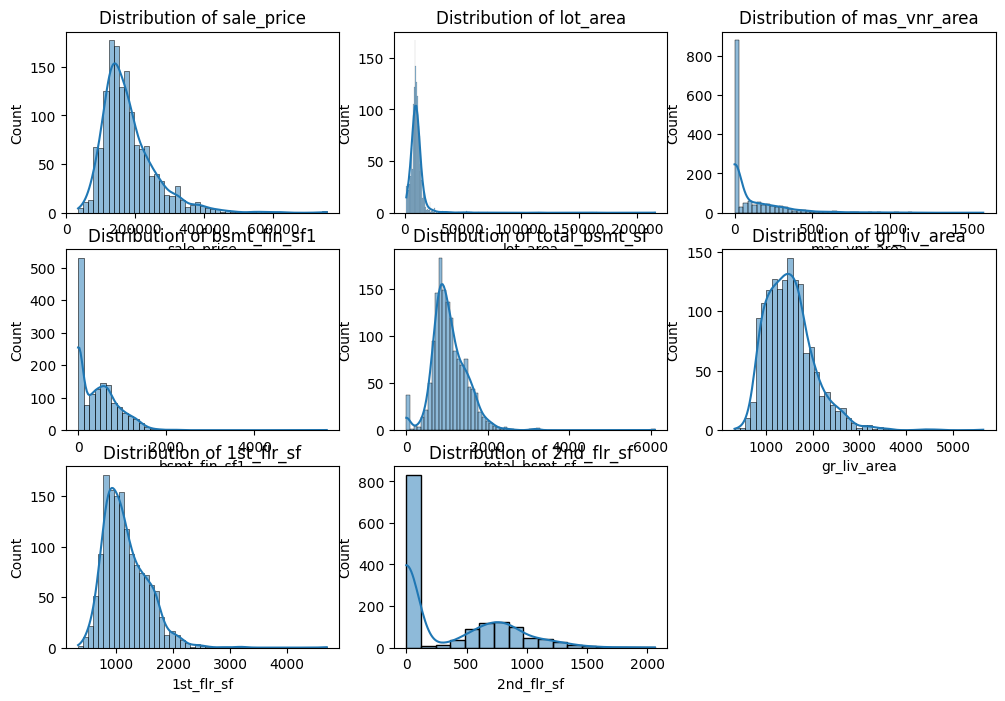

In [ ]:
# Lista de variáveis numéricas a serem plotadas
variables_to_plot = ['sale_price', 'lot_area', 'mas_vnr_area', 'bsmt_fin_sf1', 'total_bsmt_sf', 'gr_liv_area','1st_flr_sf','2nd_flr_sf']

# Configurar subplots
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[variable], kde=True)
    plt.title(f'Distribution of {variable}')

1.7.2 Categorical Attributes

In [ ]:
cat_attributes.apply (lambda x: x.unique().shape[0])

ms_zoning          5
street             2
lot_shape          4
land_contour       4
utilities          2
lot_config         5
land_slope         3
neighborhood      25
condition1         9
condition2         8
bldg_type          5
house_style        8
roof_style         6
roof_matl          8
exterior1st       15
exterior2nd       16
mas_vnr_type       4
exter_qual         4
exter_cond         5
foundation         6
bsmt_qual          4
bsmt_cond          4
bsmt_exposure      4
bsmt_fin_type1     6
bsmt_fin_type2     6
heating            6
heating_qc         5
central_air        2
electrical         5
kitchen_qual       4
functional         7
fireplace_qu       5
garage_type        6
garage_finish      3
garage_qual        5
garage_cond        5
paved_drive        3
sale_type          9
sale_condition     6
dtype: int64

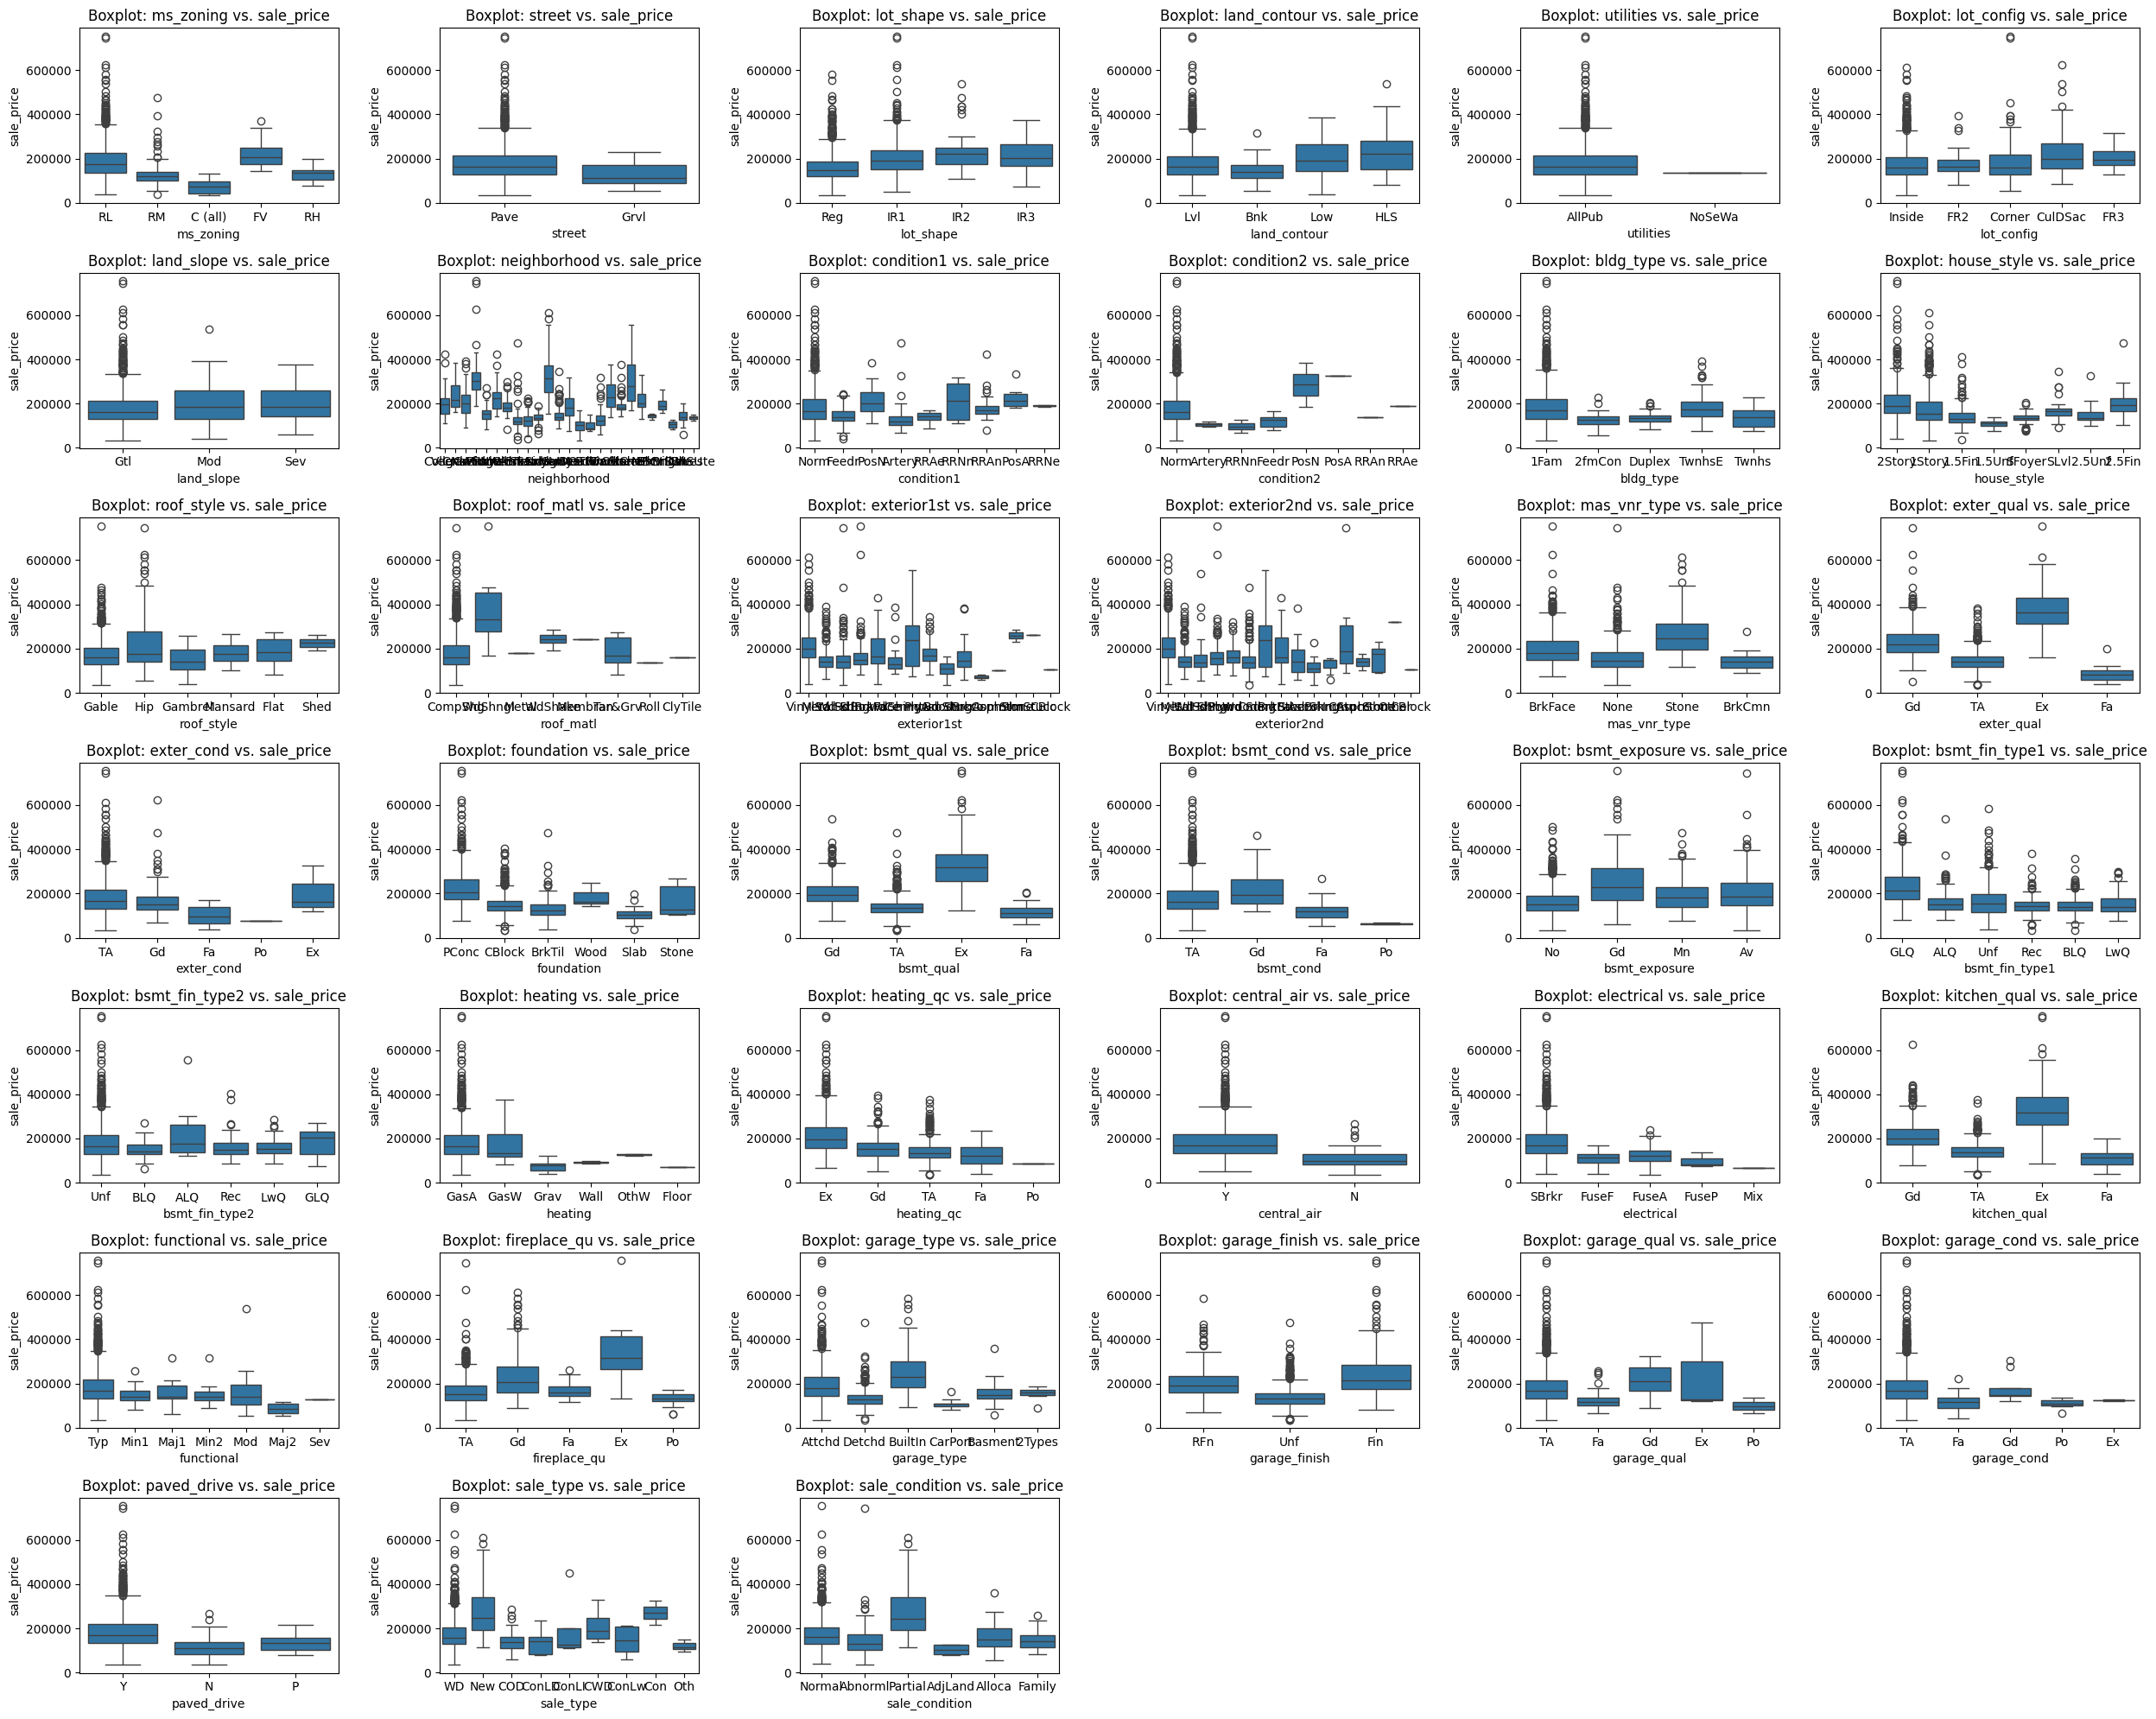

In [ ]:
# Boxplot
plt.figure(figsize=(25, 20))
for i, variable in enumerate(cat_attributes.columns, 1):
    plt.subplot(7, 6, i)
    sns.boxplot(x=variable, y='sale_price', data=df1)
    plt.title(f'Boxplot: {variable} vs. sale_price')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 42, not 43

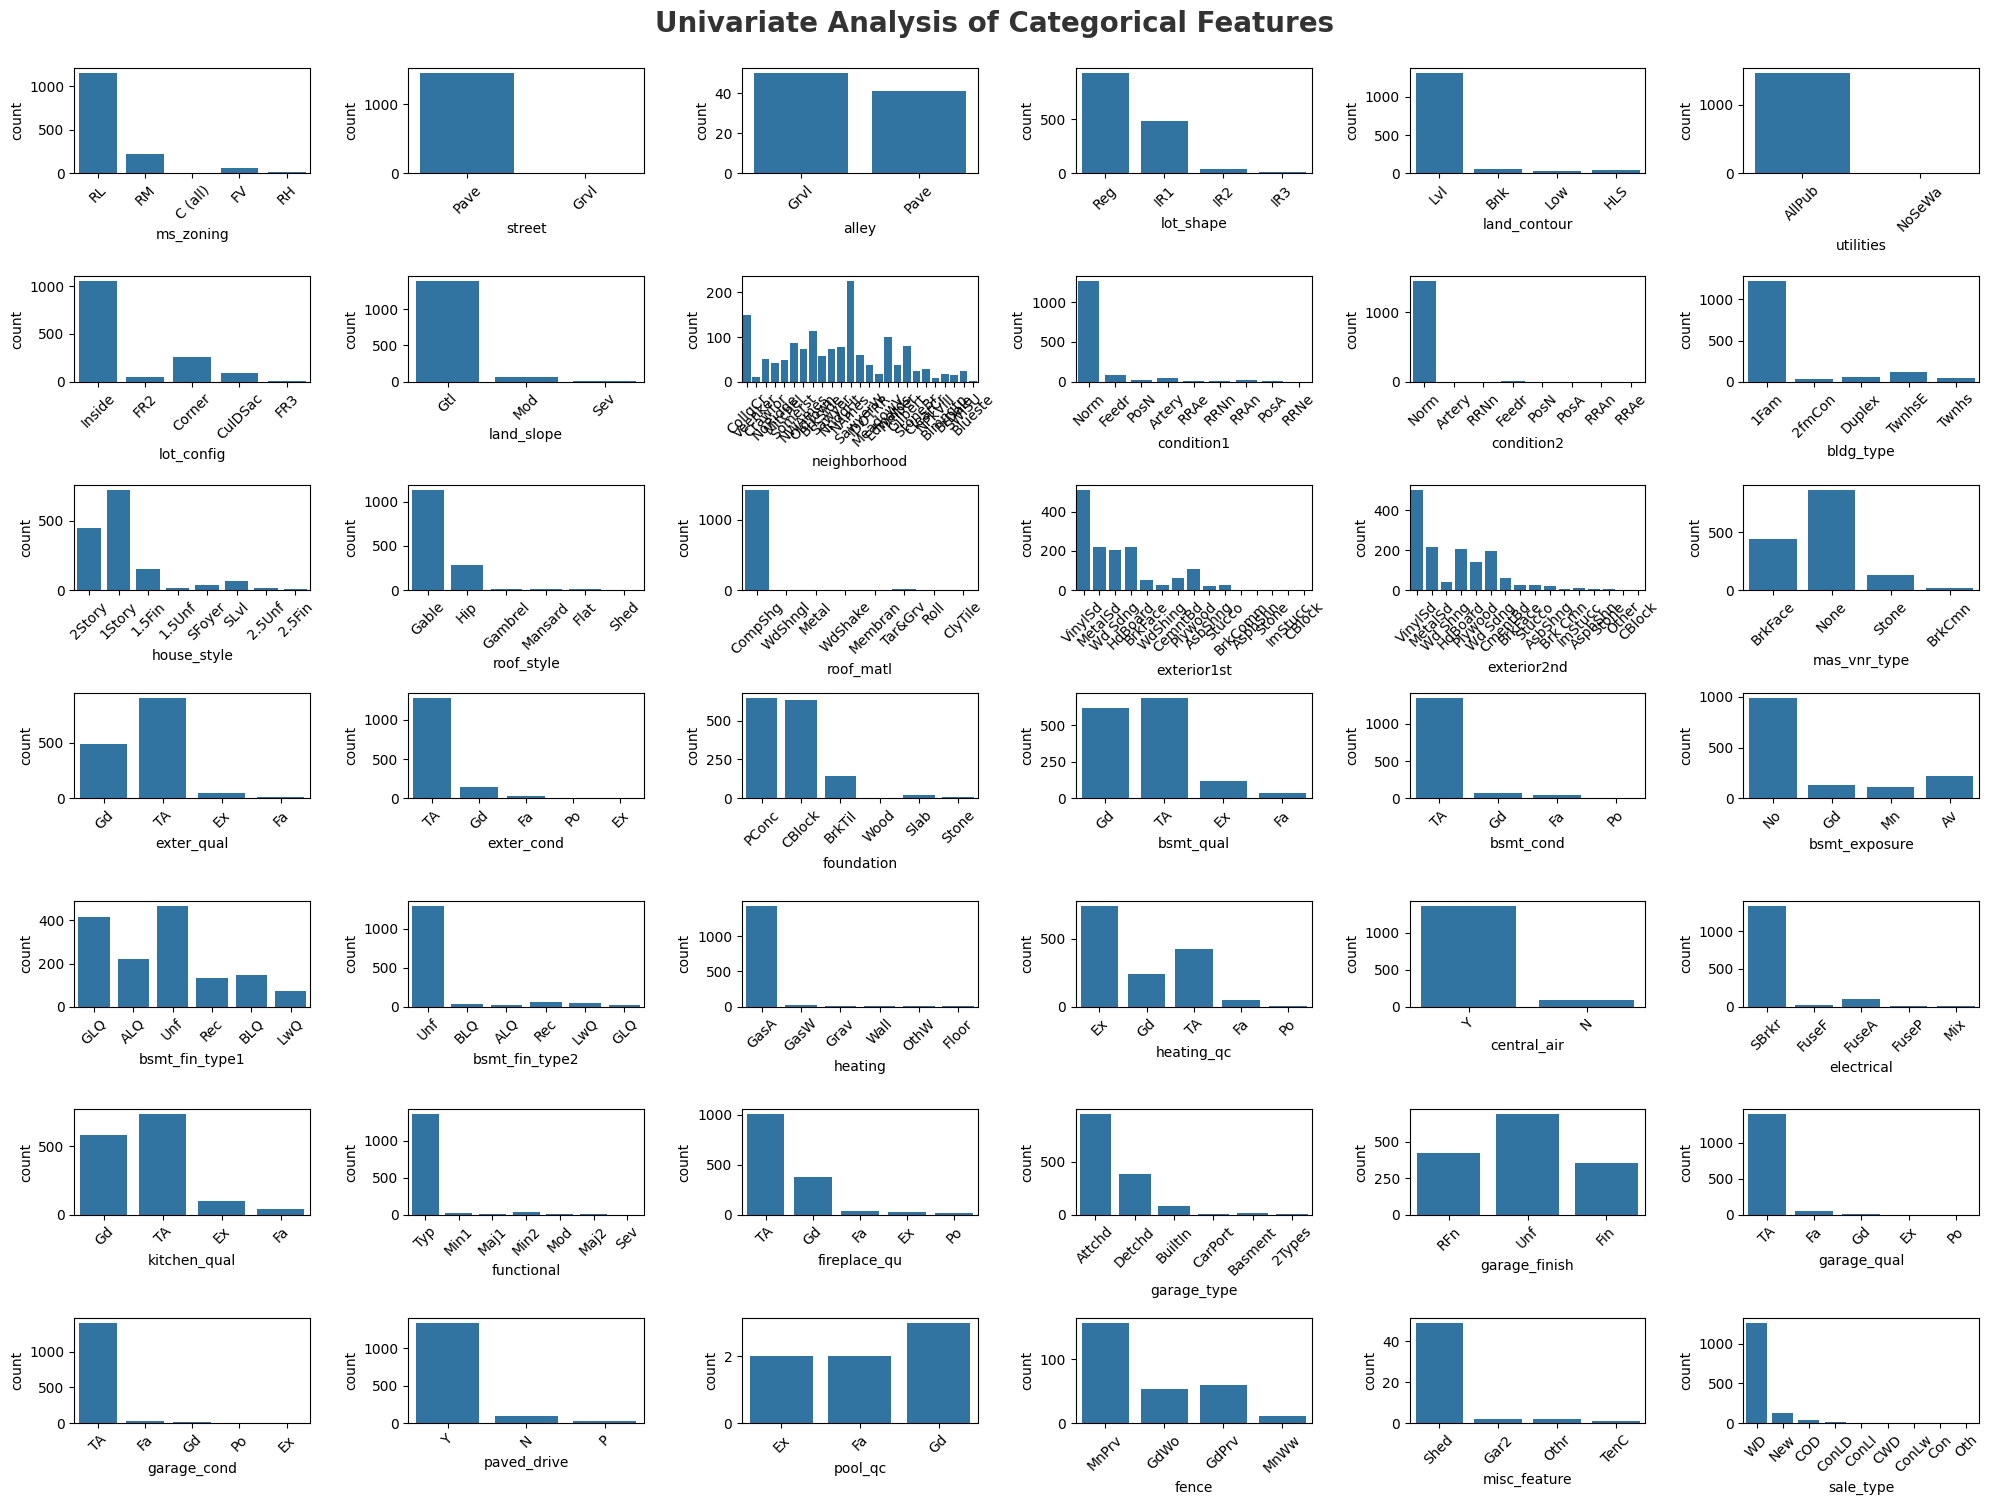

In [ ]:
# Barplot
plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_attributes):
    plt.subplot(7, 6, i + 1)
    sns.countplot(x=df1[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()




#2.0. FEATURE ENGENEERING

In [56]:
df2 = df1.copy ()

2.1 Mapa mental de hipóteses

In [ ]:
uploaded = files.upload()

Saving price_houses.png to price_houses.png


In [ ]:
mapa_mental = list(uploaded.keys())[0]

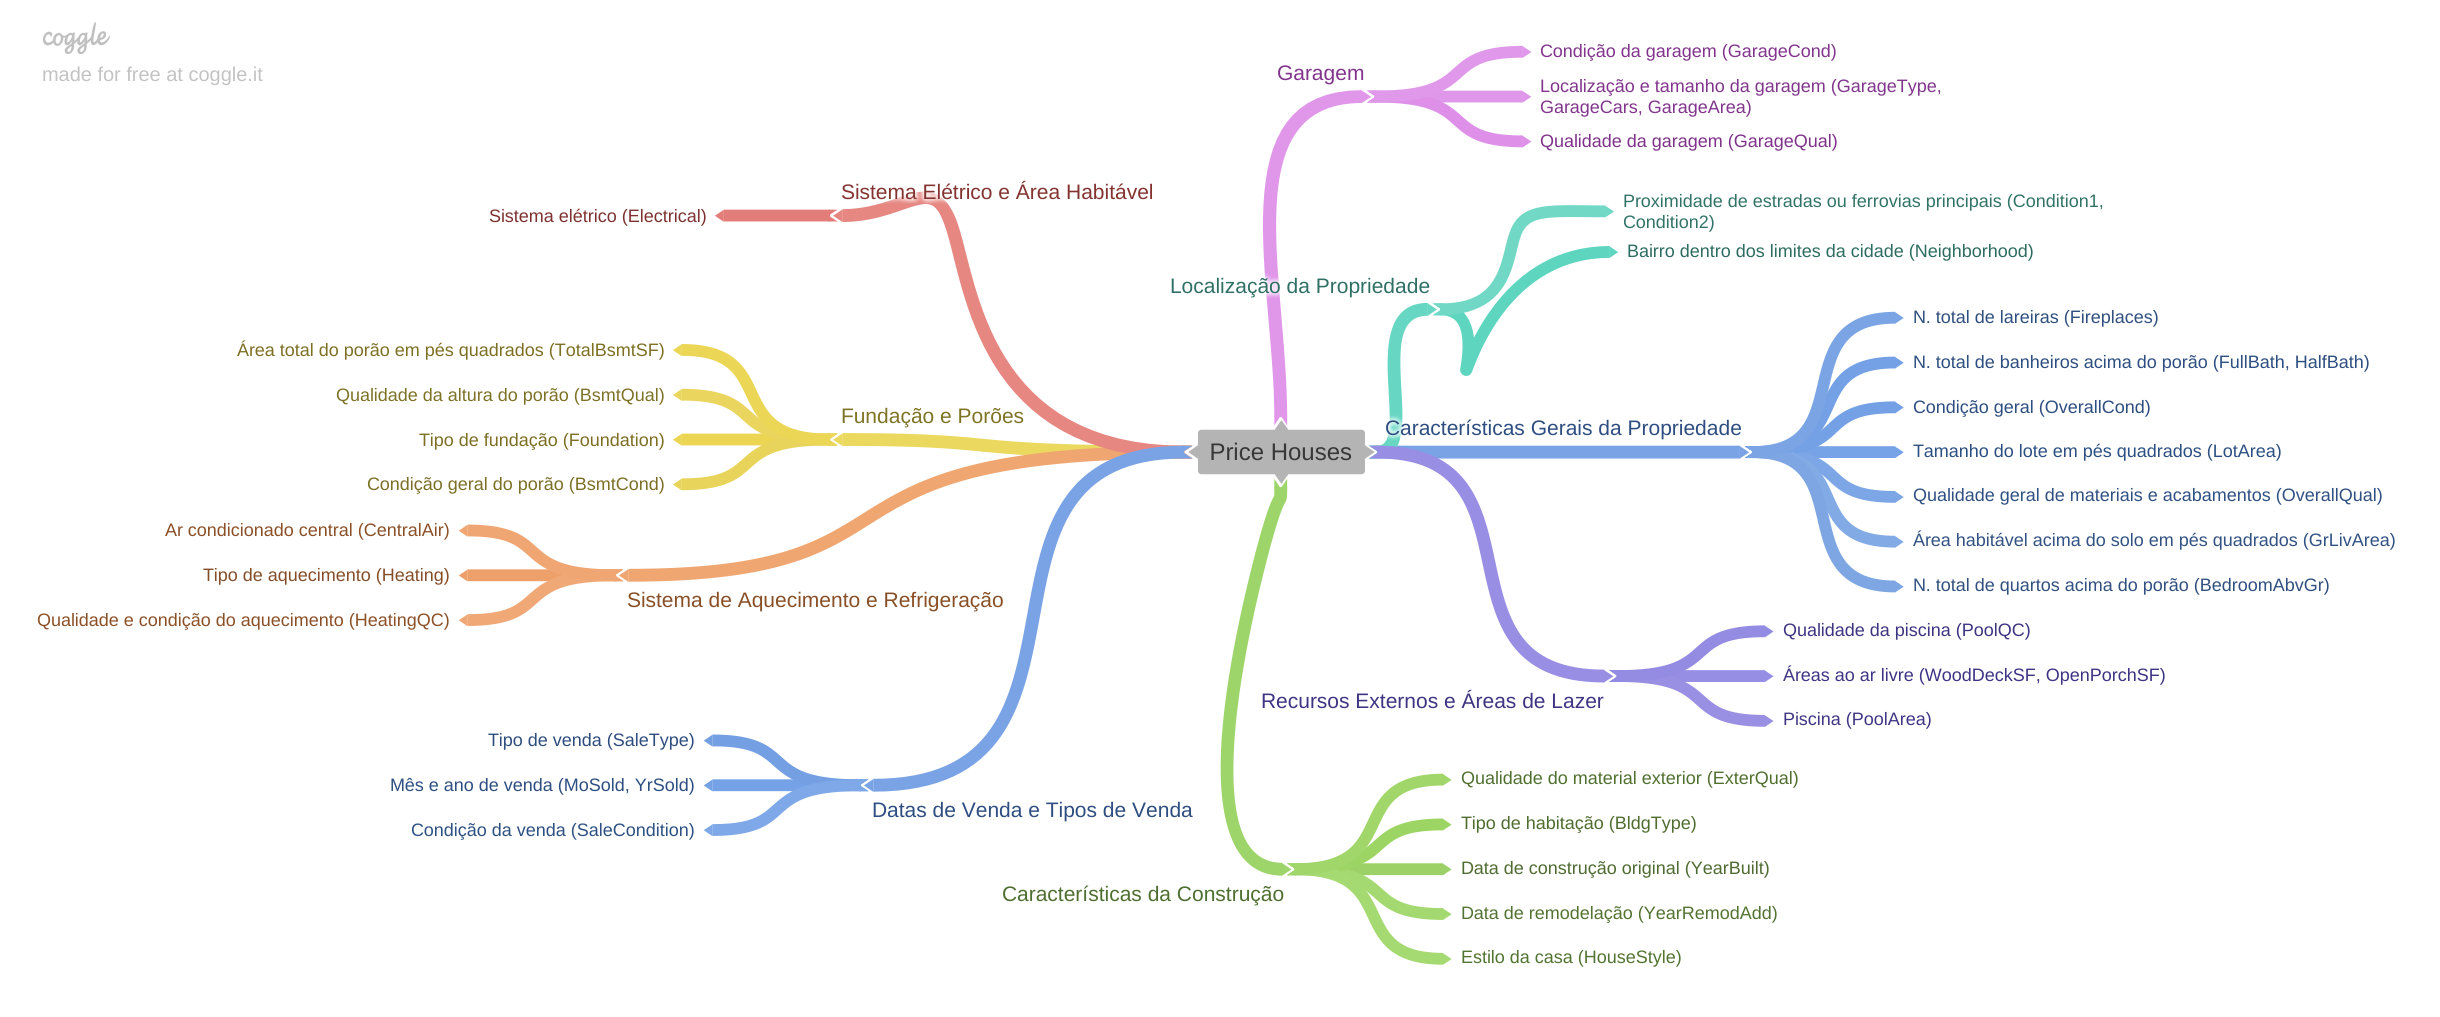

In [ ]:
Image(filename=mapa_mental)

### 2.2 Criação das hipóteses

2.2.1 Hipóteses Datas de Venda e Tipos de venda

##### 1.Vendas feitas na mesma família pode reduzir o preço.
##### 2. O momento da venda pode afetar os preços, com possíveis variações sazonais
##### 3. Vendas com financiamento convencional (WD) podem ter preços diferentes em comparação com vendas à vista (CWD) ou contratos especiais (Con, ConLw, ConLI, ConLD).
##### 4. Propriedades vendidas como "New" (novas construções) podem ter preços mais altos devido ao valor percebido de uma casa recém-construída.
##### 5. Vendas em dinheiro podem ter uma dinâmica diferente em comparação com vendas financiadas.
##### 6. Vendas com contratos e financiamentos diferentes podem ter variações nos preços.



 2.2.2 Hipóteses Características Gerais da Propriedade

##### 1. Propriedades com lotes maiores tendem a ter preços mais altos devido ao espaço adicional e potencial para expansão.
##### 2. A qualidade geral dos materiais e acabamentos tem uma correlação positiva com o preço de venda. Propriedades com classificação de qualidade mais alta podem ter preços mais elevados.
##### 3. A condição geral da propriedade afeta o preço. Propriedades em boas condições tendem a ter valores mais altos
##### 4.  espaço habitável acima do solo está diretamente relacionado ao preço. Propriedades com mais espaço geralmente têm preços mais elevados.
##### 5. O número total de banheiros influencia o preço.
##### 6. O número de quartos afeta o preço.
##### 7.  A presença de lareiras pode influenciar positivamente o preço.






2.2.3 Hipóteses Recursos Externos e Áreas de Lazer

##### 1. A qualidade da piscina, e se há ou não piscina pode influenciar no preço de venda (PoolQC).

2.2.4 Hipóteses Sistema de aquecimento e refrigeração.

##### 1. Sistemas de aquecimento e ar condicionado eficientes e de alta qualidade podem aumentar o preço do imóvel.


2.2.5 Hipóteses Características Construção

##### 1. Data de construção original (YearBuilt). Quanto mais antigo mais barato o imóvel.


### 2.3 Lista Final das hipóteses (Hipóteses que temos dados para comprovar)

##### 1.O momento da venda pode afetar os preços, com possíveis variações sazonais.
##### 2.0 Vendas com financiamento convencional (WD) podem ter preços diferentes em comparação com vendas à vista (CWD) ou contratos especiais (Con, ConLw, ConLI, ConLD).
##### 3.0 Propriedades vendidas como "New" (novas construções) podem ter preços mais altos devido ao valor percebido de uma casa recém-construída.
##### 4.0 Vendas em dinheiro podem ter uma dinâmica diferente em comparação com vendas financiadas.
##### 5.0  Propriedades com lotes maiores tendem a ter preços mais altos devido ao espaço adicional e potencial para expansão.
##### 6.0 A qualidade geral dos materiais e acabamentos tem uma correlação positiva com o preço de venda. Propriedades com classificação de qualidade mais alta podem ter preços mais elevados.
##### 7.0 A condição geral da propriedade afeta o preço. Propriedades em boas condições tendem a ter valores mais altos.
##### 8.0 O número total de banheiros influencia o preço.
##### 9.0 O número de quartos afeta o preço.
##### 10.0  A presença de lareiras pode influenciar o aumento no preço.
##### 11.0 A qualidade da piscina, e se há ou não piscina pode influenciar no preço de venda (PoolQC).
##### 12.0 Sistemas de aquecimento e ar condicionado eficientes e de alta qualidade podem aumentar o preço do imóvel.
##### 13.0 Data de construção original (YearBuilt). Quanto mais antigo mais barato o imóvel.




### 2.4 Feature Engineering

In [57]:
# Calculo da idade da propriedade no momento da venda.
df2['age'] = df2['yr_sold'] - df2['year_built']

#Há lareira?
df2 ['fireplaces_'] = df2 ['fireplaces'].apply (lambda x: 1 if x>= 1 else 0)

#Há piscina?
df2 ['pool'] = df2 ['pool_area'].apply (lambda x: 1 if x>= 1 else 0)





In [ ]:
#Verificando
df2.head().T

,0,1,2,3,4
id,1,2,3,4,5
ms_sub_class,60,20,60,70,60
ms_zoning,RL,RL,RL,RL,RL
lot_frontage,65.0,80.0,68.0,60.0,84.0
lot_area,8450,9600,11250,9550,14260
...,...,...,...,...,...
sale_condition,Normal,Normal,Normal,Abnorml,Normal
sale_price,208500,181500,223500,140000,250000
age,5,31,7,91,8
fireplaces_,0,1,1,1,1


# 3.0. Feature Selection

In [58]:
df3 = df2.copy()

In [ ]:
df3.head()

,id,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,pool_area,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price,age,fireplaces_,pool
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,5,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,31,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,7,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,91,1,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,8,1,0


## 3.1 Filtragem das linhas

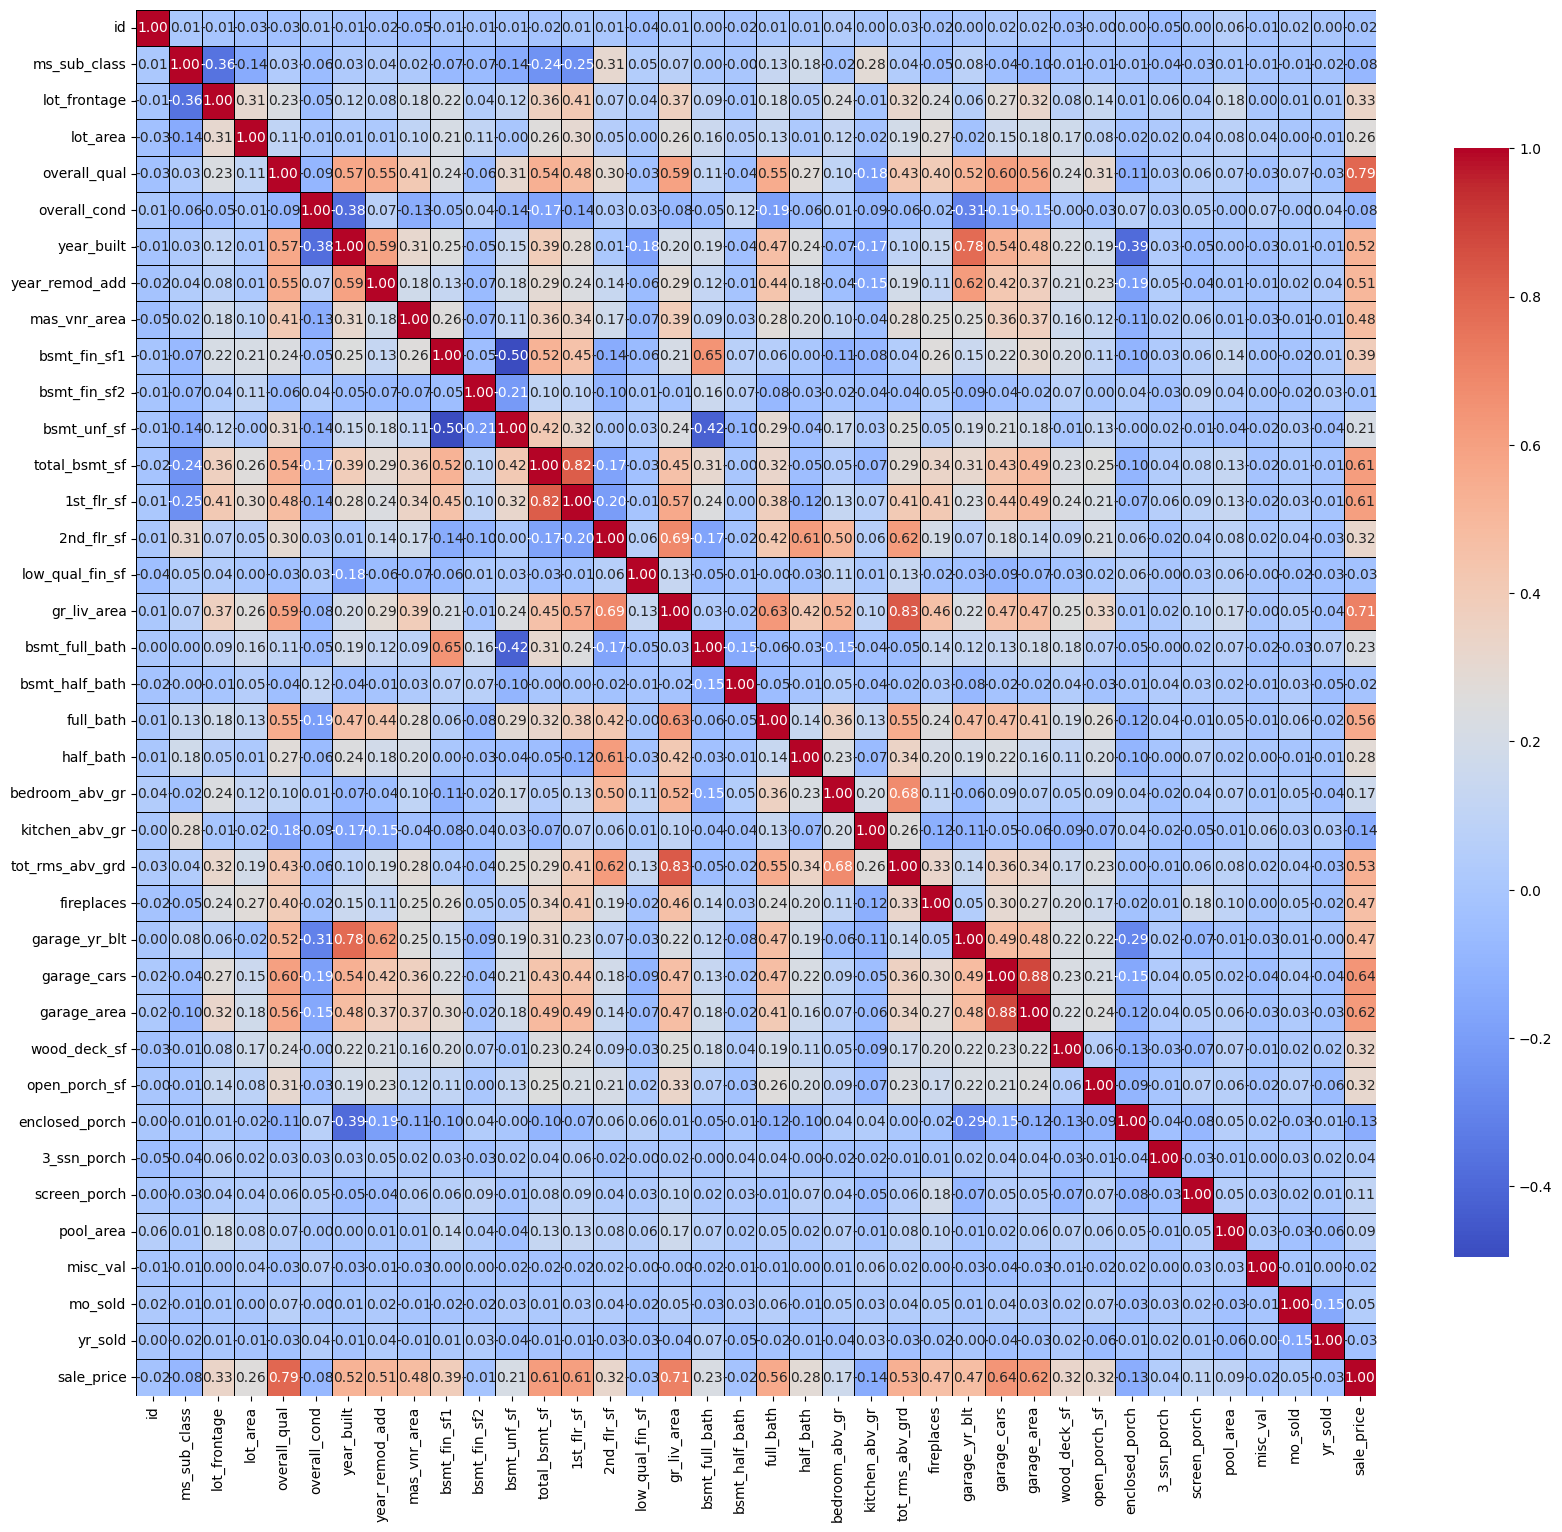

In [64]:
plt.figure(figsize=(20, 18))
#Matriz de Correlação
correlation = num_attributes.corr(method='pearson')

# Heatmap com rotação nos rótulos
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black', xticklabels=correlation.columns, yticklabels=correlation.columns, cbar_kws={"shrink": 0.8})

# Espaçamento entre os rótulos
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

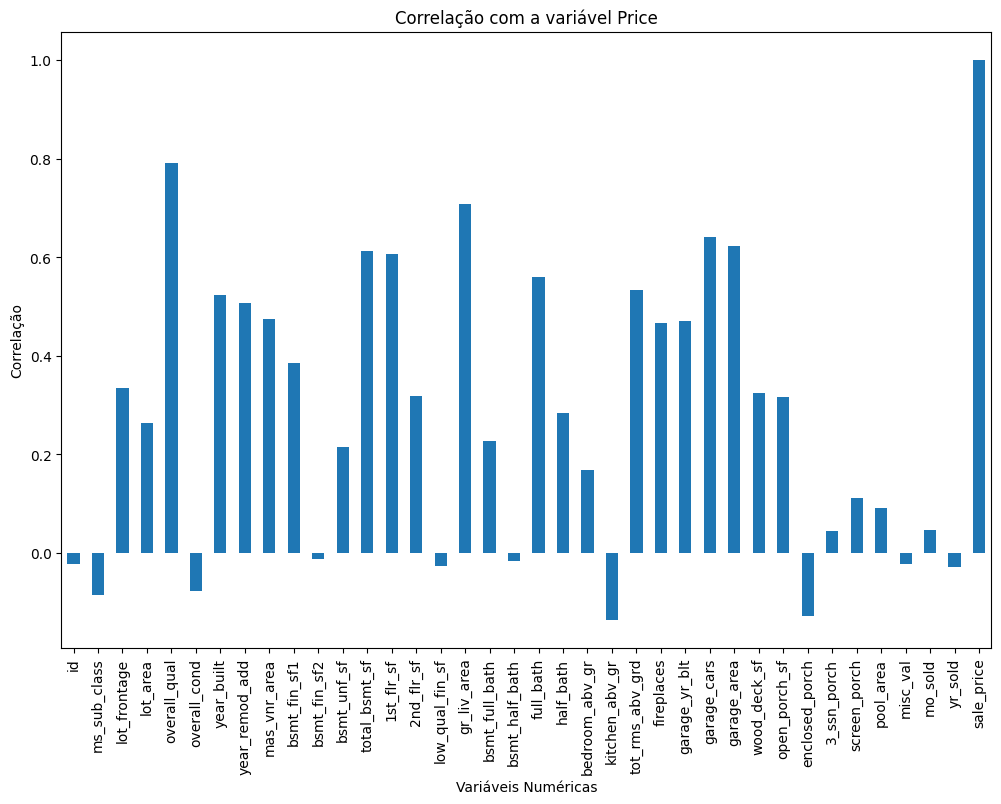

In [67]:
# Matriz de correlação entre as variáveis numéricas e a variável alvo (price)
correlation_with_price = num_attributes.corrwith(df3['sale_price'])

plt.figure(figsize=(12, 8))
correlation_with_price.plot(kind='bar')
plt.title('Correlação com a variável Price')
plt.xlabel('Variáveis Numéricas')
plt.ylabel('Correlação')
plt.show()

## 3.2 Seleção das colunas

# 4.0. EDA - ANALISE EXPLORATORIA DOS DADOS

In [ ]:
df4 = df3.copy()

## 4.1 Analise Univariada

### 4.1.1 Response Variable

<ipython-input-34-22eb7382dbe3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df4['sale_price'], kde=False)


<Axes: xlabel='sale_price'>

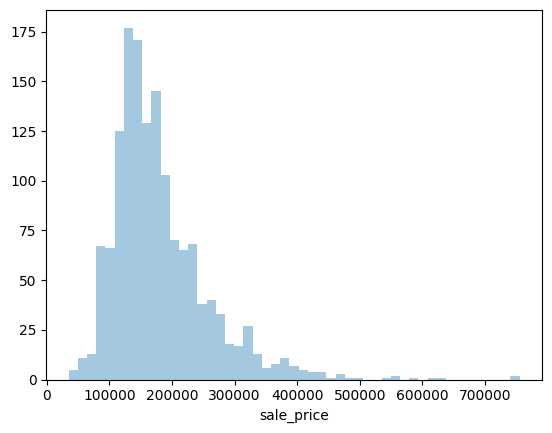

In [ ]:
sns.distplot (df4['sale_price'], kde=False)

### 4.1.2 Numerical Variable

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'ms_sub_class'}>,
        <Axes: title={'center': 'lot_frontage'}>,
        <Axes: title={'center': 'lot_area'}>,
        <Axes: title={'center': 'overall_qual'}>,
        <Axes: title={'center': 'overall_cond'}>],
       [<Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'year_remod_add'}>,
        <Axes: title={'center': 'mas_vnr_area'}>,
        <Axes: title={'center': 'bsmt_fin_sf1'}>,
        <Axes: title={'center': 'bsmt_fin_sf2'}>,
        <Axes: title={'center': 'bsmt_unf_sf'}>],
       [<Axes: title={'center': 'total_bsmt_sf'}>,
        <Axes: title={'center': '1st_flr_sf'}>,
        <Axes: title={'center': '2nd_flr_sf'}>,
        <Axes: title={'center': 'low_qual_fin_sf'}>,
        <Axes: title={'center': 'gr_liv_area'}>,
        <Axes: title={'center': 'bsmt_full_bath'}>],
       [<Axes: title={'center': 'bsmt_half_bath'}>,
        <Axes: title={'center': 'full_bath'}>,
        <Axe

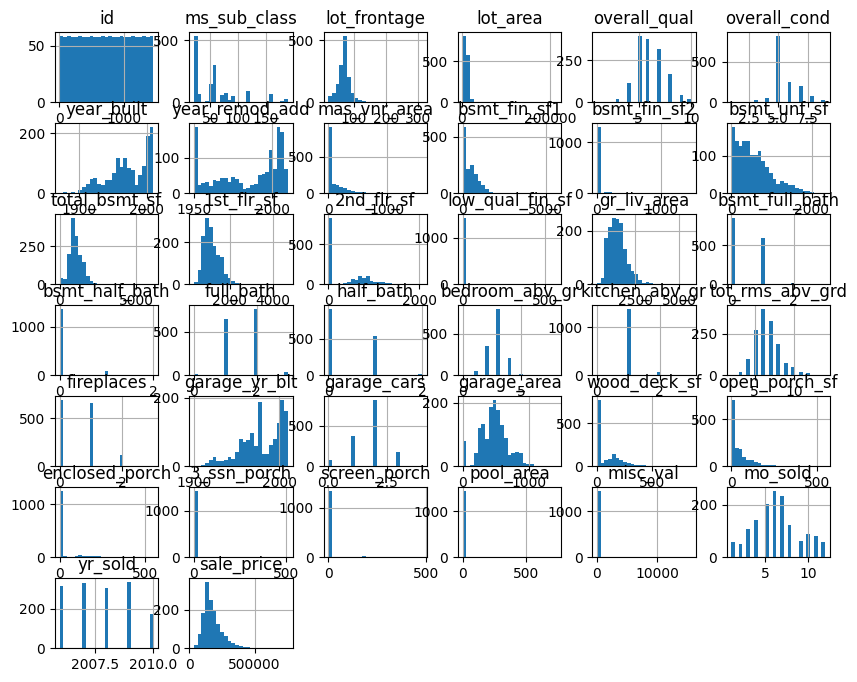

In [ ]:
num_attributes.hist(bins=25, figsize=(10, 8))

### 4.1.3 Categorical Variable

In [ ]:
cat_attributes.head()

,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition1,condition2,...,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type,sale_condition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


## 4.2 Analise Bivariada